In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Importing the dataset**

In [ ]:
df = pd.read_csv('/content/Social_Network_Ads.csv')
df.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.drop(['User ID', 'Gender'], axis = 1, inplace=True)

In [ ]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


**Splitting the dataset into the Training set and Test set**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Fitting Decision Tree Classification to the Training set**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

**Predicting the Test set results**

In [ ]:
input_data = (27, 57000)
# Changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

#Standardize the data
std_data = sc.transform(input_data_reshaped)

pred = classifier.predict(std_data)
print(pred)

[0]


In [ ]:
if (pred[0] == 0):
  print('No Purchased')
else:
  print("Purchased")

No Purchased


**Making the Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[62  6]
 [ 3 29]]


0.91

**Visualising the Training set results**

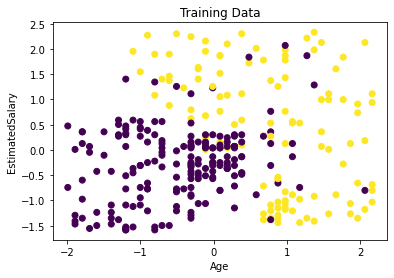

In [ ]:
plt.scatter(X_train[:,0], X_train[:,1],c=y_train)
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.title('Training Data')
plt.show()

**Visualising the Test set results**

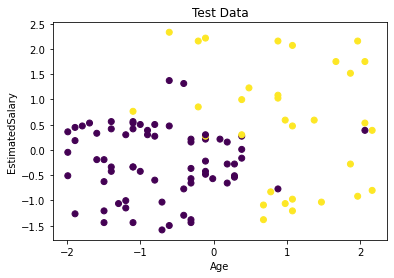

In [ ]:
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.title('Test Data')
plt.show()